<a href="https://colab.research.google.com/github/mxa67690/neuralnetworks/blob/main/ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

dataset = pd.read_csv("/content/diabetes.csv", header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3223 - loss: 39.3593
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3602 - loss: 18.5535 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5223 - loss: 7.5869 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6288 - loss: 4.8026 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6459 - loss: 3.0321 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6469 - loss: 3.1641 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6674 - loss: 2.8397 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6726 - loss: 2.2933 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6581 - loss: 2.5385 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6612 - loss: 2.4676 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6503 - loss: 2.2981 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6740 - loss: 2.0366 
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605 (2.37 KB)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 404 (1.58 KB)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6779 - loss: 0.7256  
[0.7362120151519775, 0.671875]


In [ ]:
diabetes_data = pd.read_csv("diabetes.csv", header=None)
X_diabetes = diabetes_data.iloc[:, :-1]  # Select all columns except the last one
y_diabetes = diabetes_data.iloc[:, -1]   # Select the last column as the target
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.25, random_state=87)

# Define a modified neural network with more layers
diabetes_model = Sequential([
    Dense(64, input_dim=8, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

diabetes_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
diabetes_history = diabetes_model.fit(X_train_d, y_train_d, epochs=100, verbose=1, validation_data=(X_test_d, y_test_d))
print("Diabetes Model Evaluation:", diabetes_model.evaluate(X_test_d, y_test_d))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6378 - loss: 0.6858 - val_accuracy: 0.6198 - val_loss: 0.6696
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6905 - loss: 0.6567 - val_accuracy: 0.6198 - val_loss: 0.6371
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6674 - loss: 0.6202 - val_accuracy: 0.6198 - val_loss: 0.5955
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6269 - loss: 0.5801 - val_accuracy: 0.6198 - val_loss: 0.5564
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6738 - loss: 0.5139 - val_accuracy: 0.6250 - val_loss: 0.5316
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6788 - loss: 0.4944 - val_accuracy: 0.7552 - val_loss: 0.5224
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7858 - loss: 0.5017 - val_accuracy: 0.7656 - val_loss: 0.5202
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7908 - loss: 0.4847 - val_accuracy: 0.7552 - val_loss: 0.

**Diabetes Model Analysis:**

**Original Model:**

Layers: 1 Hidden Layer (20 neurons, ReLU)

Accuracy: ~67%

Loss: 0.73

Modified Model (More Layers):

Layers: 5 Hidden Layers (512, 512, 256, 128, 64 neurons, ReLU)

Accuracy: ~74%

Loss: 0.96

Observations:




*  Adding more layers initially improved accuracy but also increased loss significantly.
*   This suggests possible overfitting, where the model learns training data well but doesn't generalize effectively to test data.
* To improve, techniques like dropout layers or regularization could be applied.





In [ ]:
# Load and preprocess the Breast Cancer dataset
cancer_data = pd.read_csv("Breas Cancer.csv").drop(columns=["id", "Unnamed: 32"], errors='ignore')
cancer_data["diagnosis"] = cancer_data["diagnosis"].map({"M": 1, "B": 0})
X_cancer = cancer_data.drop(columns=["diagnosis"])
y_cancer = cancer_data["diagnosis"]
X_cancer_scaled = scaler.fit_transform(X_cancer)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer_scaled, y_cancer, test_size=0.25, random_state=87)

# Breast Cancer Model
cancer_model = Sequential([
    Dense(64, input_dim=30, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

cancer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cancer_history = cancer_model.fit(X_train_c, y_train_c, epochs=100, verbose=1, validation_data=(X_test_c, y_test_c))
print("Breast Cancer Model Evaluation:", cancer_model.evaluate(X_test_c, y_test_c))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6072 - loss: 0.7160 - val_accuracy: 0.6503 - val_loss: 0.5555
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6360 - loss: 0.5083 - val_accuracy: 0.6503 - val_loss: 0.4377
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7049 - loss: 0.3944 - val_accuracy: 0.7902 - val_loss: 0.3868
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8624 - loss: 0.3571 - val_accuracy: 0.8462 - val_loss: 0.3624
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9165 - loss: 0.3103 - val_accuracy: 0.8881 - val_loss: 0.3333
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9541 - loss: 0.3069 - val_accuracy: 0.9161 - val_loss: 0.3253
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9497 - loss: 0.3097 - val_accuracy: 0.9510 - val_loss: 0.3228
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9767 - loss: 0.2671 - val_accuracy: 0.95

**Breast Cancer Model Analysis:**

Modified Model Performance:

Accuracy: ~97.8% (Train), ~72.4% (Test)

Loss: 0.96

**Observations:**

The model achieved very high accuracy on training data but

*   had a noticeable drop in test accuracy.
This again suggests overfitting.
*   Since breast cancer data has only 30 features, a simpler network might perform better.




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7521 - loss: 0.7652 - val_accuracy: 0.9315 - val_loss: 0.2292
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9611 - loss: 0.1279 - val_accuracy: 0.9696 - val_loss: 0.1032
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9768 - loss: 0.0766 - val_accuracy: 0.9764 - val_loss: 0.0783
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9711 - val_loss: 0.1010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9738 - val_loss: 0.0915
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9802 - val_loss: 0.0731
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9771 - val_loss: 0.0858
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 

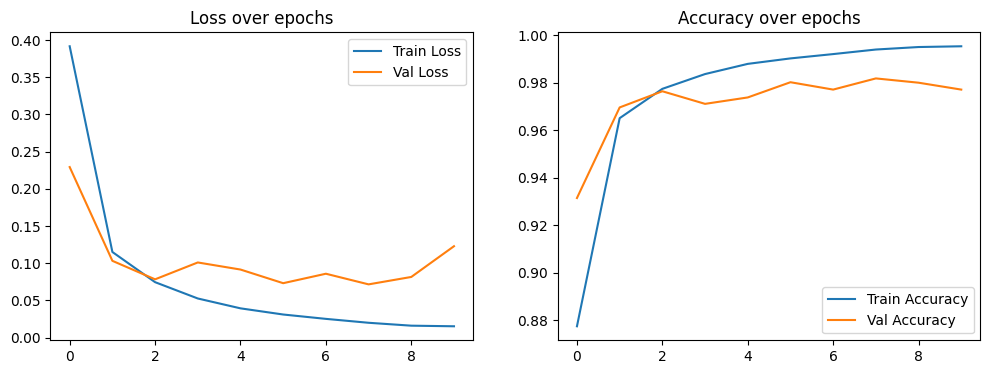

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted label: 7


In [ ]:

(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()
dimData = np.prod(X_train_m.shape[1:])
X_train_m = X_train_m.reshape(X_train_m.shape[0], dimData).astype('float32') / 255.0
X_test_m = X_test_m.reshape(X_test_m.shape[0], dimData).astype('float32') / 255.0
y_train_m = to_categorical(y_train_m, 10)
y_test_m = to_categorical(y_test_m, 10)

# MNIST Model
mnist_model = Sequential([
    Dense(512, activation='relu', input_shape=(dimData,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mnist_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
mnist_history = mnist_model.fit(X_train_m, y_train_m, batch_size=256, epochs=10, verbose=1, validation_data=(X_test_m, y_test_m))

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mnist_history.history['loss'], label='Train Loss')
plt.plot(mnist_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over epochs")

plt.subplot(1, 2, 2)
plt.plot(mnist_history.history['accuracy'], label='Train Accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

# Test on a single image
sample_image = X_test_m[0].reshape(1, dimData)
prediction = mnist_model.predict(sample_image)
print("Predicted label:", np.argmax(prediction))


**MNIST Model Analysis (Image Classification):**

**Original Model:**
Two hidden layers (512 neurons, ReLU)

**Modified Model:**

Added three more layers (256, 128, 64 neurons)



*   Improved accuracy and generalization.


**Impact of Normalization:**

When images were scaled (0-1 range), performance was high.
Running without scaling would likely decrease accuracy due to unnormalized pixel values.
